In [2]:
import pandas as pd

In [3]:
#讀取資料
df_02=pd.read_csv(r"C:/Users/Owen/Desktop/bank.csv")
df_02.describe()
#describe預設只看數值欄位，若需要看全部欄位的狀態，可以下已下的指令
#df_02.describe(include='all') 

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [3]:
#檢查有無遺漏值
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 17 columns):
age          18924 non-null int64
job          18924 non-null object
marital      18924 non-null object
education    18924 non-null object
default      18924 non-null object
balance      18924 non-null int64
housing      18924 non-null object
loan         18924 non-null object
contact      18924 non-null object
day          18924 non-null int64
month        18924 non-null object
duraction    18924 non-null int64
campaign     18924 non-null int64
pdays        18924 non-null int64
previous     18924 non-null int64
poutcome     18924 non-null object
outcome      18924 non-null int64
dtypes: int64(8), object(9)
memory usage: 2.5+ MB


In [108]:
import numpy as np
import math
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).
        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []
 
 
    ages = ages.reshape((1,len(ages)))[0]
    net_worths = net_worths.reshape((1,len(ages)))[0]
    predictions = predictions.reshape((1,len(ages)))[0]
    # zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
    cleaned_data = zip(ages,net_worths,abs(net_worths-predictions))
    #按照error大小排序
    cleaned_data = sorted(cleaned_data , key=lambda x: (x[2]))
    #ceil() 函数返回数字的上入整数，计算要删除的元素个数
    cleaned_num = int(-1 * math.ceil(len(cleaned_data)* 0.1))
    #切片
    cleaned_data = cleaned_data[:cleaned_num]
    
    return cleaned_data
print(cleaned_data)

[0        2143
1          29
2           2
3        1506
4           1
5         231
6         447
7           2
8         121
9         593
10        270
11        390
12          6
13         71
14        162
15        229
16         13
17         52
18         60
19          0
20        723
21        779
22         23
23         50
24          0
25       -372
26        255
27        113
28       -246
29        265
         ... 
45181    6879
45182     133
45183     324
45184    1495
45185    4256
45186    1500
45187    1168
45188     703
45189     199
45190     136
45191    3810
45192     765
45193     159
45194     138
45195    1146
45196     358
45197    1511
45198    1428
45199    1475
45200     557
45201     583
45202     557
45203     113
45204    2850
45205     505
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64]


In [4]:
df_corr = df_02.corr()
# 圖像化
import matplotlib.pyplot as mp, seaborn
seaborn.heatmap(df_corr, center=0, annot=True)
mp.show()

In [5]:
#Y和X的相關性
corr_matrix=df_corr
corr_matrix['outcome'].sort_values(ascending=False)

outcome      1.000000
pdays        0.099353
previous     0.015439
campaign     0.005323
age         -0.064391
balance     -0.073723
day         -0.086621
duraction   -0.461726
Name: outcome, dtype: float64

In [6]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df_02.dtypes, df_02.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

8 Numeric Features : ['age', 'balance', 'day', 'duraction', 'campaign', 'pdays', 'previous', 'outcome']



In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [8]:
# 削減文字型欄位, 只剩數值型欄位(這個對於後面畫圖蠻重要的 建議記起來)
df_int = df_02[num_features]
df_int = df_02.fillna(-1)
MMEncoder = MinMaxScaler()
df_int.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duraction,campaign,pdays,previous,poutcome,outcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F3FA2C8BE0>,
      dtype=object)

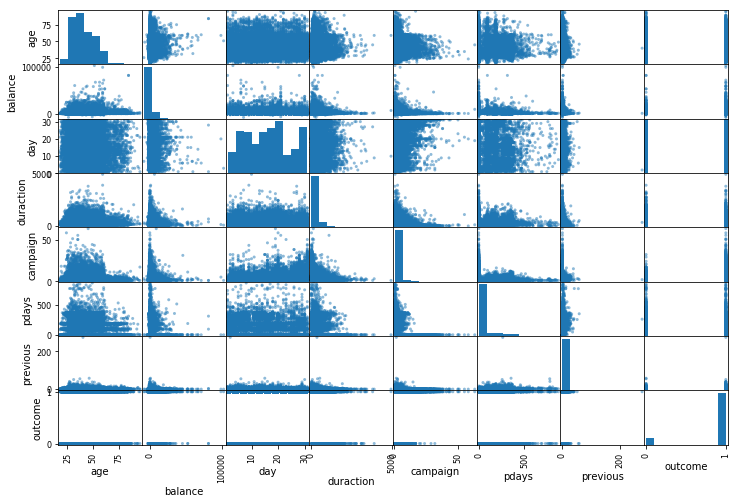

In [15]:
#建立分部矩陣
from pandas.plotting import scatter_matrix
#下面這個只是指定欄位要甚麼，不一定要用
##attributes =["balance","age","housing","day","duraction","campaign","pdays","previous","outcome"]
scatter_matrix(df_int, figsize=(12, 8))


In [44]:
#讀取資料
df=pd.read_excel(r"C:/Users/Owen/Desktop/bank_marketing3.xlsx")
df02=df.drop(['outcome'],axis=1)
print(df02)


       age   job  marital  education  default  balance  housing  loan  \
0       59   1.0        2        2.0        0     2343        1     0   
1       56   1.0        2        2.0        0       45        0     0   
2       41  10.0        2        2.0        0     1270        1     0   
3       55   8.0        2        2.0        0     2476        1     0   
4       54   1.0        2        3.0        0      184        0     0   
5       42   5.0        3        3.0        0        0        1     1   
6       56   5.0        2        3.0        0      830        1     1   
7       60   6.0        1        2.0        0      545        1     0   
8       39  10.0        3        NaN        0    45248        1     0   
9       37  10.0        2        2.0        0        1        1     0   
10      34   1.0        2        2.0        0      869        0     0   
11      55  11.0        1        2.0        0      387        1     0   
12      28   8.0        3        2.0        0     5

In [45]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duraction,campaign,pdays,previous,poutcome,outcome
count,16871.000000,16787.000000,16871.000000,16164.000000,16871.000000,16871.000000,16871.000000,16871.000000,16119.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,6713.000000,16871.000000
mean,40.468437,5.300232,2.236915,2.184855,0.008891,1506.852469,0.561733,0.115524,1.091941,13.556873,5.436252,319.438267,2.199218,93.222275,1.262403,1.653657,0.686503
std,12.330859,3.235106,0.632552,0.660892,0.093875,3142.147891,0.496189,0.319662,0.288952,7.637672,2.392009,314.872322,1.842066,139.036113,2.656387,0.812755,0.463928
min,18.000000,1.000000,1.000000,1.000000,0.000000,-4057.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000,0.000000
25%,31.000000,2.000000,2.000000,2.000000,0.000000,146.000000,0.000000,0.000000,1.000000,7.000000,4.000000,121.000000,1.000000,-1.000000,0.000000,1.000000,0.000000
50%,37.000000,5.000000,2.000000,2.000000,0.000000,563.000000,1.000000,0.000000,1.000000,13.000000,5.000000,218.000000,2.000000,-1.000000,0.000000,1.000000,1.000000
75%,48.000000,8.000000,3.000000,3.000000,0.000000,1646.000000,1.000000,0.000000,1.000000,18.000000,7.000000,403.000000,3.000000,181.000000,2.000000,2.000000,1.000000
max,95.000000,11.000000,3.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,12.000000,3881.000000,32.000000,871.000000,58.000000,3.000000,1.000000


In [46]:
#將遺漏資料填補成0
df_test=df.fillna(0)
print(df_test)

       age   job  marital  education  default  balance  housing  loan  \
0       59   1.0        2        2.0        0     2343        1     0   
1       56   1.0        2        2.0        0       45        0     0   
2       41  10.0        2        2.0        0     1270        1     0   
3       55   8.0        2        2.0        0     2476        1     0   
4       54   1.0        2        3.0        0      184        0     0   
5       42   5.0        3        3.0        0        0        1     1   
6       56   5.0        2        3.0        0      830        1     1   
7       60   6.0        1        2.0        0      545        1     0   
8       39  10.0        3        0.0        0    45248        1     0   
9       37  10.0        2        2.0        0        1        1     0   
10      34   1.0        2        2.0        0      869        0     0   
11      55  11.0        1        2.0        0      387        1     0   
12      28   8.0        3        2.0        0     5

In [47]:
df_temp = pd.get_dummies(df_02)
print(df_temp)

       age  balance  day  duraction  campaign  pdays  previous  outcome  \
0       59     2343    5       1042         1     -1         0        0   
1       56       45    5       1467         1     -1         0        0   
2       41     1270    5       1389         1     -1         0        0   
3       55     2476    5        579         1     -1         0        0   
4       54      184    5        673         2     -1         0        0   
5       42        0    5        562         2     -1         0        0   
6       56      830    6       1201         1     -1         0        0   
7       60      545    6       1030         1     -1         0        0   
8       39    45248    6       1623         1     -1         0        0   
9       37        1    6        608         1     -1         0        0   
10      34      869    6       1677         1     -1         0        0   
11      55      387    6        918         1     -1         0        0   
12      28     5090    6 

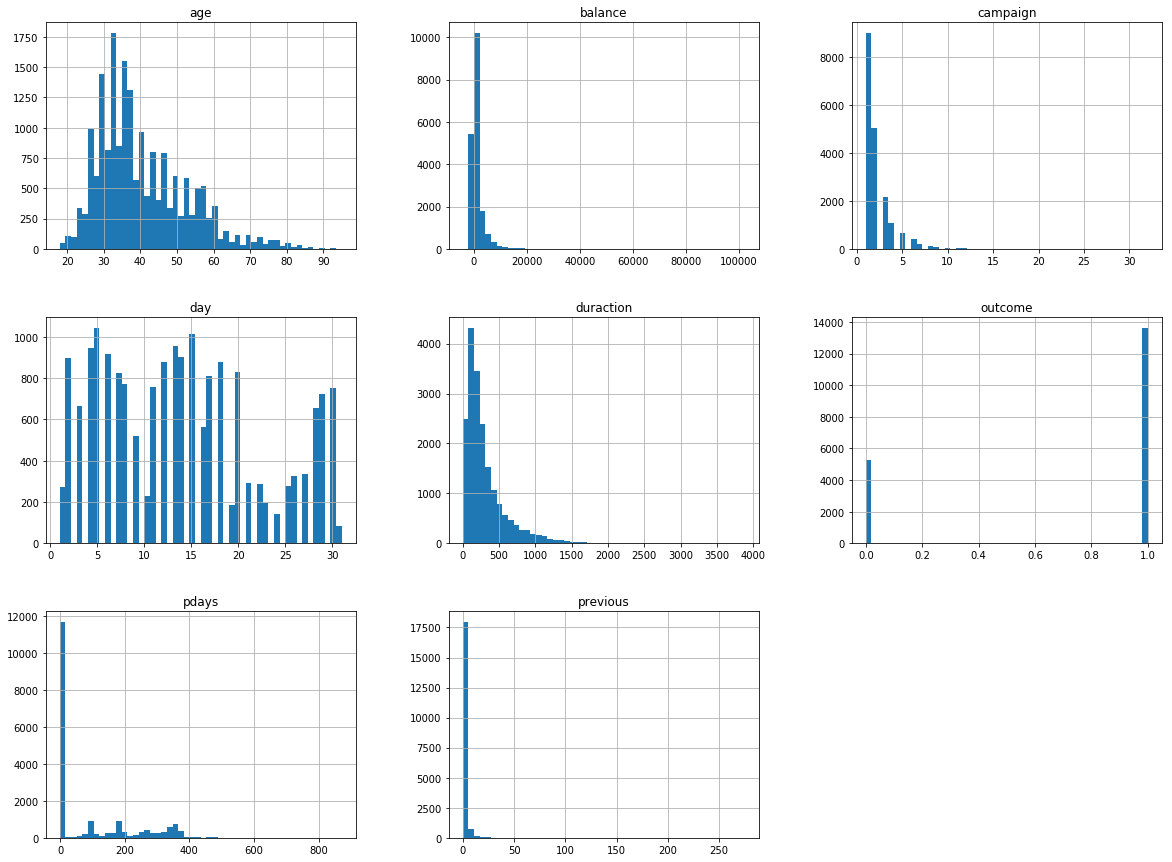

In [48]:
#畫散佈圖
%matplotlib inline
import matplotlib.pyplot as plt
df_int.hist(bins=50, figsize=(20,15))
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
X= df_test[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duraction','campaign','pdays','previous','poutcome']]
Y= df_test['outcome']
#切分測試與訓練資料(下面是有分層抽跟隨機)
##X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42, stratify=df_test['outcome'])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [50]:
#對X_train標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
print(X_train_std)

[[ 1.25382523  0.22036526 -0.3764921  ...  0.81537895 -0.09806264
   0.35780886]
 [ 1.01167377 -1.00947016 -0.3764921  ...  1.13247741  1.04844626
   0.35780886]
 [-0.68338652  0.83528296 -0.3764921  ... -0.67642516 -0.48023228
  -0.68539451]
 ...
 [ 0.28521936 -1.00947016  1.20395497 ...  2.2927695   1.81278553
   0.35780886]
 [ 1.01167377  0.22036526 -0.3764921  ... -0.67642516 -0.48023228
  -0.68539451]
 [ 0.36593652  0.52782411 -0.3764921  ...  0.59917546 -0.09806264
   2.44421561]]


In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,
                  multi_class='ovr',n_jobs=1,penalty='12',random_state=None,solver='liblinear',tol=0.0001,
                  verbose=0,warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='12', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
#測試logistic模型的準度
from sklearn.metrics import precision_score
precision_score(Y_test,lr.predict(X_test))

0.8319591676482135

In [53]:
#建立羅吉斯回歸模型
import pandas as pd 
import numpy as np
from sklearn import preprocessing, linear_model
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
print(logistic_regr.coef_)

[[-1.60302383e-03 -1.40926707e-02  2.80498244e-02 -1.61886312e-01
  -2.72716807e-01 -1.06922367e-05  1.25703147e+00  1.73696997e-01
   8.70669626e-01 -2.93123900e-02 -1.18991712e-01 -4.47333316e-03
   1.29503593e-02  2.93347154e-03  1.58307536e-02 -5.33115210e-01]]


In [55]:
print(logistic_regr.intercept_ )

[2.33397911]


In [56]:
result = logistic_regr.fit(X_train, Y_train)

In [57]:
from sklearn.feature_selection import f_regression
print(f_regression(X_train,Y_train)[1])

[5.34728527e-014 8.57354210e-016 5.61800064e-001 1.44051775e-016
 4.05132633e-001 4.01347242e-014 9.94697045e-217 2.93485683e-008
 2.89880741e-053 1.06103019e-064 5.16593689e-166 0.00000000e+000
 5.62287544e-002 4.67258794e-041 4.33290750e-002 1.23812325e-026]


In [58]:
#篩選特徵
from sklearn.linear_model import RandomizedLogisticRegression as RLR
rlr = RLR(selection_threshold=0.5)
rlr.fit(X_train_std,Y_train) #训练模型
rlr.get_support() #获取特征筛选结果
print(u'通過羅吉斯篩選特徵已結束。')
print(u'有效特徵為：%s' % ','.join(df02.columns[rlr.get_support()]))

C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


通過羅吉斯篩選特徵已結束。
有效特徵為：education,housing,contact,day,month,duraction,pdays,poutcome


In [59]:
import statsmodels.api as sm

In [60]:
train_cols = df02.columns[rlr.get_support()]
print(train_cols)


Index(['education', 'housing', 'contact', 'day', 'month', 'duraction', 'pdays',
       'poutcome'],
      dtype='object')


In [61]:
logit = sm.Logit(df_test['outcome'], df_test[train_cols])

In [62]:
#最佳化結果
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.440159
         Iterations 6


In [63]:
#建置羅吉斯回歸結果
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            No. Iterations:   6.0000    
Dependent Variable: outcome          Pseudo R-squared: 0.292     
Date:               2019-09-25 01:11 AIC:              14867.8404
No. Observations:   16871            BIC:              14929.7072
Df Model:           7                Log-Likelihood:   -7425.9   
Df Residuals:       16863            LL-Null:          -10492.   
Converged:          1.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
education     0.1331    0.0219    6.0857  0.0000   0.0902   0.1759
housing       1.4822    0.0427   34.7414  0.0000   1.3986   1.5658
contact       1.5719    0.0514   30.5728  0.0000   1.4712   1.6727
day          -0.0112    0.0024   -4.6405  0.0000  -0.0160  -0.0065
month        -0.0519    0.0074   -6.9996  0.0000  -0.0664  -0.0374
duraction    -0.0041    0.0001  -46.6453  0.0000  -0.0043  -0.0039
pdays         0.0035    0.0002   16.1638  0.0000   0.0031   0.0039
poutcome     -0.5547    0.0259  -21.3893  0.0000  -0.6055  -0.5038
=================================================================

"""

In [64]:
#檢視odds
print (np.exp(result.params))

education    1.142345
housing      4.402528
contact      4.815987
day          0.988849
month        0.949417
duraction    0.995928
pdays        1.003519
poutcome     0.574268
dtype: float64


In [65]:
Y_scores=lr.decision_function(X_test)

In [66]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_scores)

In [67]:
from sklearn.metrics import auc
auc(fpr,tpr)

0.8731876956020423

In [68]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test, lr.predict(X_test))
print (accuracy)

0.8091851851851852


In [69]:
#建立混淆矩陣
print(metrics.classification_report(Y_test,lr.predict(X_test)))

             precision    recall  f1-score   support

          0       0.74      0.59      0.66      1040
          1       0.83      0.91      0.87      2335

avg / total       0.80      0.81      0.80      3375



In [39]:
#視覺化混淆矩陣
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion matrix, without normalization
[[ 612  428]
 [ 216 2119]]


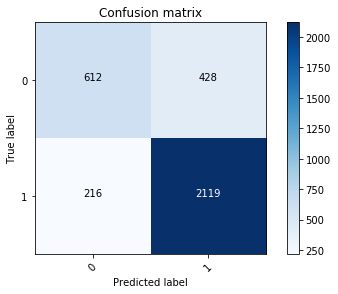

In [70]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, lr.predict(X_test))
target_names = ['0','1']

plot_confusion_matrix(cnf_matrix, classes=target_names) #注意：targeet_names必須和confusion_matrix中labels的順序一致
plt.show()

In [71]:
print(cnf_matrix)

[[ 612  428]
 [ 216 2119]]


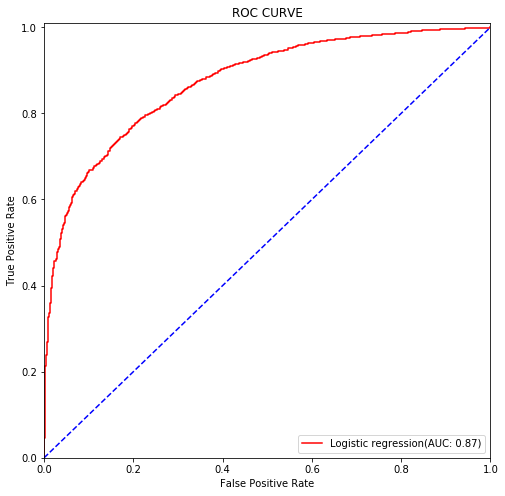

In [72]:
#繪製ROC曲線
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,color='red',label='Logistic regression(AUC: %.2f)'
        %auc(fpr,tpr))
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.01])
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()